In [51]:
import os
import cv2
import matplotlib.pyplot as plt
import torch
import random
import numpy as np
from datetime import datetime
import time 

from model import Generator

def load_image(path, size=None):
    image = image2tensor(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB))

    w, h = image.shape[-2:]
    if w != h:
        crop_size = min(w, h)
        left = (w - crop_size)//2
        right = left + crop_size
        top = (h - crop_size)//2
        bottom = top + crop_size
        image = image[:,:,left:right, top:bottom]

    if size is not None and image.shape[-1] != size:
        image = torch.nn.functional.interpolate(image, (size, size), mode="bilinear", align_corners=True)
    
    return image

def image2tensor(image):
    image = torch.FloatTensor(image).permute(2,0,1).unsqueeze(0)/255.
    return (image-0.5)/0.5

def tensor2image(tensor):
    tensor = tensor.clamp_(-1., 1.).detach().squeeze().permute(1,2,0).cpu().numpy()
    return tensor*0.5 + 0.5

def imshow(img, size=5, cmap='jet'):
    plt.figure(figsize=(size,size))
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()
    

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list
      _local_devices())
# How many GPUs are there?
print(torch.cuda.device_count())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4075971111916315093
]
1


20211118_222430
Elapsed time:2.069312810897827
20211118_222432
Elapsed time:1.8119595050811768
20211118_222434
Elapsed time:1.9019050598144531
20211118_222436
Elapsed time:1.8329429626464844
20211118_222438
Elapsed time:1.868924617767334
20211118_222439
Elapsed time:1.8859162330627441
20211118_222441
Elapsed time:1.8184857368469238
20211118_222443
Elapsed time:1.8559088706970215
20211118_222445
Elapsed time:1.9019620418548584
20211118_222447
Elapsed time:2.045727014541626
20211118_222449
Elapsed time:1.940093755722046
20211118_222451
Elapsed time:1.8050382137298584
20211118_222453
Elapsed time:1.8258941173553467
20211118_222455
Elapsed time:1.9120385646820068
20211118_222456
Elapsed time:1.8311662673950195
20211118_222458
Elapsed time:1.8289892673492432
20211118_222500
Elapsed time:1.8119871616363525
20211118_222502
Elapsed time:1.816999912261963
20211118_222504
Elapsed time:1.8460216522216797
20211118_222506
Elapsed time:1.8955059051513672
20211118_222508
Elapsed time:1.97470021247863

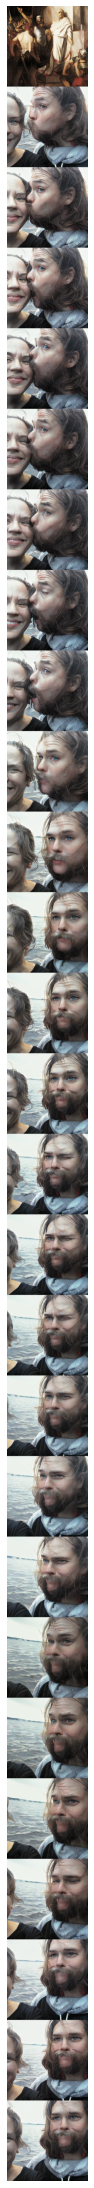

True

In [54]:
#cpu, cuda, xpu, mkldnn, opengl, opencl, ideep, hip, ve, ort, mlc, xla, lazy, vulkan, meta, hpu de
device = 'cuda'
torch.set_grad_enabled(True)
image_size = 1000 # Can be tuned, works best when the face width is between 200~250 px

model = Generator().eval().to(device)


#ckpt = torch.load(f"weights/celeba_distill.pt", map_location=device)
#ckpt = torch.load(f"weights/paprika.pt", map_location=device)
#ckpt = torch.load(f"weights/face_paint_512_v1.pt", map_location=device)
ckpt = torch.load(f"weights/face_paint_512_v2.pt", map_location=device)

model.load_state_dict(ckpt)

hakemisto="samples/muita/"

number_files = len(os.listdir(hakemisto))

kuvat = os.listdir(hakemisto)
 
results = []

for j in kuvat:
    start = time.time()
    
    

    now = datetime.now()
    dt = now.strftime("%Y%m%d_%H%M%S")
    print(dt)
    image = load_image(f"{hakemisto}{j}", image_size)
    with torch.no_grad():
        output = model(image.to(device))
    
    kuva =torch.cat([output.cpu()], 3)
    tiedosto=f"samples/tuloksia/video/{dt}{j}.jpg"
    #cv2.imwrite(tiedosto, cv2.cvtColor(255*tensor2image(kuva), cv2.COLOR_BGR2RGB))
    cv2.imwrite(tiedosto, cv2.cvtColor(255*tensor2image(kuva), cv2.COLOR_BGR2RGB))
    results.append(kuva)
    
    #clean up
    gc.collect()

    torch.cuda.empty_cache()
    end = time.time()
    print(f"Elapsed time:{end - start}")
results = torch.cat(results, 2)    


imshow(tensor2image(results),40)
cv2.imwrite('./samples/face_results.jpg', cv2.cvtColor(255*tensor2image(results), cv2.COLOR_BGR2RGB))